In [1]:
%pip install --upgrade openai
%pip install --upgrade tqdm

%pip install --upgrade python-igraph leidenalg

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from openai import OpenAI
from tqdm import tqdm

from src.helper_func.graph_util import *
from src.helper_func.project_util import *

from collections import Counter
import time

import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms, viz, evaluation, ensemble

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'infomap', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [3]:
config = read_ini_file('../config.ini')
project_name = config['project']['name']
project_desc = config['project']['desc']
(project_name,project_desc)

('jhotdraw-v5.1',
 'JHotDraw is a two-dimensional graphics framework for structured drawing editors that is written in Java')

In [4]:
ifile = f'../../test/2-architecture-layering-output/JHotDraw-5.1-output.json'
graph = read_json_file(ifile)
nodes,edges = transform_graph(graph)

len(nodes), nodes

(3212,
 {'CH.ifa.draw.util.PaletteLayout(int)': {'id': 'CH.ifa.draw.util.PaletteLayout(int)',
   'properties': {'visibility': 'public',
    'simpleName': '<init>(int)',
    'qualifiedName': 'CH.ifa.draw.util.PaletteLayout(int)',
    'kind': 'constructor',
    'sourceText': '/**\r\n * Initializes the palette layout.\r\n *\r\n * @param gap\r\n * \t\tthe gap between palette entries.\r\n */\r\npublic PaletteLayout(int gap) {\r\n    this(gap, new java.awt.Point(0, 0), true);\r\n}',
    'docComment': 'Initializes the palette layout.\r\n\r\n@param gap\r\n\t\tthe gap between palette entries.\r\n',
    'metaSrc': 'source code',
    'description': 'Initialize a PaletteLayout object with the specified gap and default Point coordinates.',
    'returns': {'type': 'PaletteLayout',
     'description': 'A new instance of PaletteLayout with the specified gap and default Point coordinates.'},
    'reason': 'Provided to initialize a PaletteLayout object with a specified gap value.',
    'howToUse': 'Crea

In [5]:
# Flatten the list of labels and count each label
label_counts = Counter(label for node in nodes.values() for label in node['labels'])

total_nodes = 0

# Print the count of each label
for label, count in label_counts.items():
    total_nodes += count
    print(f"{label}: {count}")
	
print(f"All labels: {total_nodes}")

Constructor: 166
Variable: 1706
Operation: 1161
Structure: 156
Container: 15
Primitive: 8
All labels: 3212


In [6]:
p_layer_nodes = [node_id for node_id, node_data in nodes.items() if node_data['properties'].get('layer') == 'Presentation Layer']

len(p_layer_nodes), p_layer_nodes

(824,
 ['CH.ifa.draw.standard.SelectAreaTracker(CH.ifa.draw.framework.DrawingView)',
  'CH.ifa.draw.applet.DrawApplet()',
  'CH.ifa.draw.framework.DrawingView.drawBackground(java.awt.Graphics)',
  'CH.ifa.draw.util.Geom.ovalAngleToPoint(java.awt.Rectangle,double)',
  'CH.ifa.draw.standard.StandardDrawingView.selectionZOrdered()',
  'CH.ifa.draw.figures.AttributeFigure.drawFrame(java.awt.Graphics)',
  'CH.ifa.draw.standard.BoxHandleKit',
  'CH.ifa.draw.util.PaletteIcon.pressed()',
  'CH.ifa.draw.util.FloatingTextField.addActionListener(java.awt.event.ActionListener)',
  'CH.ifa.draw.framework.Drawing.sendToBack(CH.ifa.draw.framework.Figure)',
  'CH.ifa.draw.standard.ActionTool',
  'CH.ifa.draw.contrib.PolygonTool(CH.ifa.draw.framework.DrawingView)',
  'CH.ifa.draw.standard.AbstractTool.mouseDown(java.awt.event.MouseEvent,int,int)',
  'CH.ifa.draw.figures.TextFigure.createCurrentFont()',
  'CH.ifa.draw.standard.StandardDrawingView.mousePressed(java.awt.event.MouseEvent)',
  'CH.ifa.draw.

In [7]:
len(edges), edges

(9,
 {'hasParameter': [{'id': '85f7decf2077091af50b1bc309bb72cb',
    'source': 'CH.ifa.draw.figures.FontSizeHandle(CH.ifa.draw.framework.Figure,CH.ifa.draw.framework.Locator)',
    'label': 'hasParameter',
    'properties': {'weight': 1, 'metaSrc': 'source code'},
    'target': 'CH.ifa.draw.figures.FontSizeHandle(CH.ifa.draw.framework.Figure,CH.ifa.draw.framework.Locator).0'},
   {'id': 'ab5636fa4864daad57cec10dc4f68618',
    'source': 'CH.ifa.draw.util.Geom.intersect(int,int,int,int,int,int,int,int)',
    'label': 'hasParameter',
    'properties': {'weight': 1, 'metaSrc': 'source code'},
    'target': 'CH.ifa.draw.util.Geom.intersect(int,int,int,int,int,int,int,int).1'},
   {'id': 'b1487e48c7487f80a11f999ecc856360',
    'source': 'CH.ifa.draw.standard.ToolButton.paintBackground(java.awt.Graphics)',
    'label': 'hasParameter',
    'properties': {'weight': 1, 'metaSrc': 'source code'},
    'target': 'CH.ifa.draw.standard.ToolButton.paintBackground(java.awt.Graphics).0'},
   {'id': '61

In [8]:
total_edges = 0

# Count and print the count of each label
for key in edges.keys():
	total_edges += len(edges[key])
	print(f"{key}: {len(edges[key])}")
	
print(f"All labels: {total_edges}")

hasParameter: 1375
invokes: 1707
hasVariable: 331
hasScript: 1327
type: 1306
returnType: 447
instantiates: 252
specializes: 130
contains: 169
All labels: 7044


In [9]:
edges_list = []

edges_list += edges['contains'] + edges['hasScript'] + edges['invokes']

len(edges_list), edges_list

(3203,
 [{'id': 'b93ed26dafe14d69fdcc2846e5a6c4f5',
   'source': 'CH',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa'},
  {'id': '4cac4d60d2500eb2db71ef1193861da9',
   'source': 'CH.ifa.draw.samples.javadraw',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.samples.javadraw.JavaDrawViewer'},
  {'id': '50126edc1c29189f877c4173c609d113',
   'source': 'CH.ifa.draw.framework',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.framework.DrawingChangeListener'},
  {'id': '62e71069776490e1bbb2c96b565c68bc',
   'source': 'CH.ifa',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw'},
  {'id': '4cdf5e28b7246027c050d979626e9717',
   'source': 'CH.ifa.draw.framework',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa

In [10]:
p_layer_edges = extract_edges(edges_list, p_layer_nodes)

len(p_layer_edges), p_layer_edges

(1281,
 [{'id': '4cac4d60d2500eb2db71ef1193861da9',
   'source': 'CH.ifa.draw.samples.javadraw',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.samples.javadraw.JavaDrawViewer'},
  {'id': '900277af0d56d4473a9b306bd7f91982',
   'source': 'CH.ifa.draw.samples.net',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.samples.net.NodeFigure'},
  {'id': '965392ece7620cbb5cae29127c92d15f',
   'source': 'CH.ifa.draw.samples.javadraw',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.samples.javadraw.JavaDrawApplet'},
  {'id': '55c07308710df877c8afd5f0f6ee24b9',
   'source': 'CH.ifa.draw.contrib',
   'label': 'contains',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.contrib.PolygonScaleHandle'},
  {'id': 'b729cd9007b5d68aef5be22fa7562c79',
   'source': 'CH.ifa.draw.samples.javadraw',

In [11]:
p_layer_edges_invokes = [edge for edge in p_layer_edges if edge['label']=='invokes']

len(p_layer_edges_invokes), p_layer_edges_invokes

(695,
 [{'id': 'e8685d6533b53e8c2ab4971969be9892',
   'source': 'CH.ifa.draw.standard.DecoratorFigure.draw(java.awt.Graphics)',
   'label': 'invokes',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.framework.Figure.draw(java.awt.Graphics)'},
  {'id': '10ebcfdea0ab425143dafac2f7a92414',
   'source': 'CH.ifa.draw.samples.net.NodeFigure.handles()',
   'label': 'invokes',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.standard.RelativeLocator.west()'},
  {'id': 'bd2a170950557894a74177016099facf',
   'source': 'CH.ifa.draw.standard.SouthWestHandle(CH.ifa.draw.framework.Figure)',
   'label': 'invokes',
   'properties': {'weight': 1, 'metaSrc': 'source code'},
   'target': 'CH.ifa.draw.standard.LocatorHandle(CH.ifa.draw.framework.Figure,CH.ifa.draw.framework.Locator)'},
  {'id': '4c1e5ab4cea078a3b9ab3826755beb27',
   'source': 'CH.ifa.draw.application.DrawApplication.createEditMenu()',
   'label': 'invokes',
   'propert

In [12]:
lifting_edges = lift(edges['hasScript'], p_layer_edges_invokes)

len(lifting_edges), lifting_edges

(195,
 [{'source': 'CH.ifa.draw.samples.javadraw.JavaDrawApp',
   'target': 'CH.ifa.draw.samples.javadraw.JavaDrawApp',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 5}},
  {'source': 'CH.ifa.draw.samples.javadraw.URLTool',
   'target': 'CH.ifa.draw.samples.javadraw.URLTool',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 3}},
  {'source': 'CH.ifa.draw.figures.PolyLineFigure',
   'target': 'CH.ifa.draw.figures.LineDecoration',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 2}},
  {'source': 'CH.ifa.draw.figures.RectangleFigure',
   'target': 'CH.ifa.draw.standard.BoxHandleKit',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'CH.ifa.draw.standard.RelativeLocator',
   'target': 'CH.ifa.draw.framework.Figure',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'CH.ifa.draw.standard.HandleTracker',
   'target': 'CH.ifa.

In [13]:
lifting_edges = [edge for edge in lifting_edges if edge['source']!=edge['target']]

len(lifting_edges), lifting_edges

(153,
 [{'source': 'CH.ifa.draw.figures.PolyLineFigure',
   'target': 'CH.ifa.draw.figures.LineDecoration',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 2}},
  {'source': 'CH.ifa.draw.figures.RectangleFigure',
   'target': 'CH.ifa.draw.standard.BoxHandleKit',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'CH.ifa.draw.standard.RelativeLocator',
   'target': 'CH.ifa.draw.framework.Figure',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'CH.ifa.draw.standard.HandleTracker',
   'target': 'CH.ifa.draw.standard.AbstractTool',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 3}},
  {'source': 'CH.ifa.draw.samples.javadraw.JavaDrawApp',
   'target': 'CH.ifa.draw.util.CommandMenu',
   'label': 'hasScript-invokes-inv_hasScript',
   'properties': {'weight': 1}},
  {'source': 'CH.ifa.draw.standard.ActionTool',
   'target': 'CH.ifa.draw.standard.Abstra

In [14]:
weighted_edges_list = [(edge['source'], edge['target'], edge['properties']['weight']) for edge in lifting_edges]

len(weighted_edges_list), weighted_edges_list

(153,
 [('CH.ifa.draw.figures.PolyLineFigure',
   'CH.ifa.draw.figures.LineDecoration',
   2),
  ('CH.ifa.draw.figures.RectangleFigure',
   'CH.ifa.draw.standard.BoxHandleKit',
   1),
  ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.framework.Figure', 1),
  ('CH.ifa.draw.standard.HandleTracker',
   'CH.ifa.draw.standard.AbstractTool',
   3),
  ('CH.ifa.draw.samples.javadraw.JavaDrawApp',
   'CH.ifa.draw.util.CommandMenu',
   1),
  ('CH.ifa.draw.standard.ActionTool', 'CH.ifa.draw.standard.AbstractTool', 3),
  ('CH.ifa.draw.samples.javadraw.PatternPainter',
   'CH.ifa.draw.framework.DrawingView',
   1),
  ('CH.ifa.draw.contrib.PolygonTool', 'CH.ifa.draw.standard.AbstractTool', 2),
  ('CH.ifa.draw.contrib.PolygonTool', 'CH.ifa.draw.framework.DrawingView', 2),
  ('CH.ifa.draw.standard.SelectAreaTracker',
   'CH.ifa.draw.standard.AbstractTool',
   5),
  ('CH.ifa.draw.figures.RoundRectangleFigure',
   'CH.ifa.draw.standard.BoxHandleKit',
   1),
  ('CH.ifa.draw.figures.GroupCommand', '

In [15]:
weighted_edges_list[0]

('CH.ifa.draw.figures.PolyLineFigure', 'CH.ifa.draw.figures.LineDecoration', 2)

In [16]:
# Create a new graph
G_w = nx.Graph()

# Add weighted edges to the graph
G_w.add_weighted_edges_from(weighted_edges_list)

# Find connected components
connected_components_w = [G_w.subgraph(c).copy() for c in nx.connected_components(G_w)]

# Now, connected_components is a list of sets, where each set is a connected component (i.e., a sublist of nodes that are connected to each other)
len(connected_components_w), connected_components_w

(3,
  <networkx.classes.graph.Graph at 0x1d1921f07c0>])

In [17]:
# Sort components by greater size
sorted_list_ccw = []

for component in connected_components_w:
    sorted_list_ccw.append(list(component))
    sorted_list_ccw = sorted(sorted_list_ccw, key=len, reverse=True)
	
for i, component in enumerate(sorted_list_ccw):
	print(f"Feature {i+1}: {len(component)}")
    
sorted_list_ccw

Feature 1: 115
Feature 2: 2
Feature 3: 2


[['CH.ifa.draw.figures.RectangleFigure',
  'CH.ifa.draw.standard.BoxHandleKit',
  'CH.ifa.draw.standard.RelativeLocator',
  'CH.ifa.draw.framework.Figure',
  'CH.ifa.draw.standard.HandleTracker',
  'CH.ifa.draw.standard.AbstractTool',
  'CH.ifa.draw.samples.javadraw.JavaDrawApp',
  'CH.ifa.draw.util.CommandMenu',
  'CH.ifa.draw.standard.ActionTool',
  'CH.ifa.draw.samples.javadraw.PatternPainter',
  'CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.contrib.PolygonTool',
  'CH.ifa.draw.standard.SelectAreaTracker',
  'CH.ifa.draw.figures.RoundRectangleFigure',
  'CH.ifa.draw.figures.GroupCommand',
  'CH.ifa.draw.application.DrawApplication',
  'CH.ifa.draw.standard.DragTracker',
  'CH.ifa.draw.applet.DrawApplet',
  'CH.ifa.draw.standard.StandardDrawingView',
  'CH.ifa.draw.standard.BringToFrontCommand',
  'CH.ifa.draw.samples.net.NetApp',
  'CH.ifa.draw.figures.TextTool',
  'CH.ifa.draw.standard.TextHolder',
  'CH.ifa.draw.util.CommandChoice',
  'CH.ifa.draw.standard.ConnectionHandle',

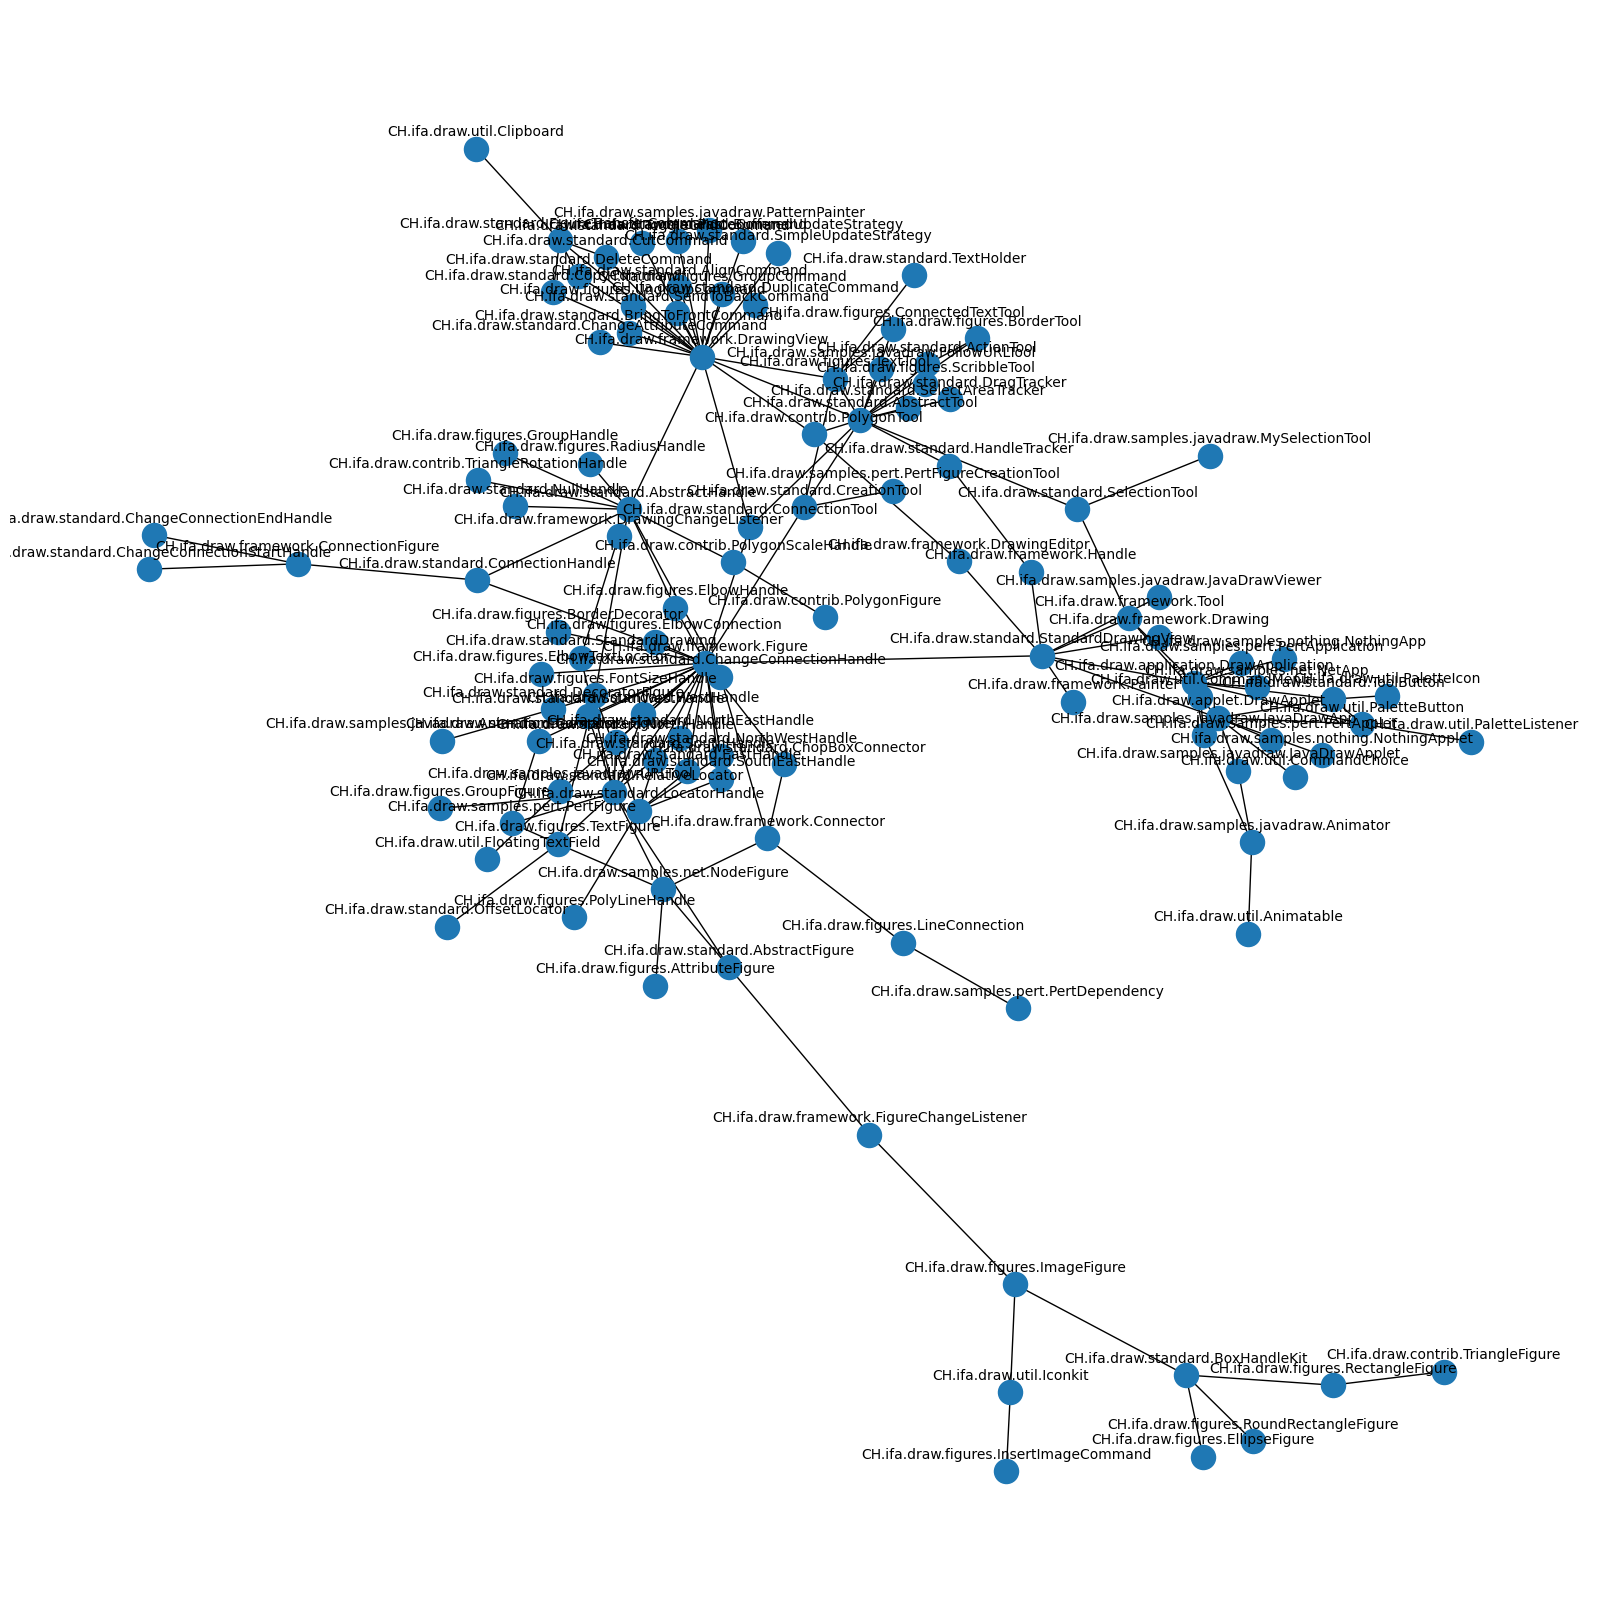

In [18]:
# Get the positions of the nodes
pos = nx.spring_layout(connected_components_w[1])

# Create a new dictionary for label positions
label_pos = {node: (x, y+0.02) for node, (x, y) in pos.items()}
plt.figure(figsize=(16, 16))
# Draw the subgraph
nx.draw(connected_components_w[1], pos, with_labels=False)
nx.draw_networkx_labels(connected_components_w[1], label_pos, font_size=10)

# Display the graph
plt.show()

In [33]:
print(connected_components_w[1].nodes)

['CH.ifa.draw.figures.RectangleFigure', 'CH.ifa.draw.standard.BoxHandleKit', 'CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.framework.Figure', 'CH.ifa.draw.standard.HandleTracker', 'CH.ifa.draw.standard.AbstractTool', 'CH.ifa.draw.samples.javadraw.JavaDrawApp', 'CH.ifa.draw.util.CommandMenu', 'CH.ifa.draw.standard.ActionTool', 'CH.ifa.draw.samples.javadraw.PatternPainter', 'CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.contrib.PolygonTool', 'CH.ifa.draw.standard.SelectAreaTracker', 'CH.ifa.draw.figures.RoundRectangleFigure', 'CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.application.DrawApplication', 'CH.ifa.draw.standard.DragTracker', 'CH.ifa.draw.applet.DrawApplet', 'CH.ifa.draw.standard.StandardDrawingView', 'CH.ifa.draw.standard.BringToFrontCommand', 'CH.ifa.draw.samples.net.NetApp', 'CH.ifa.draw.figures.TextTool', 'CH.ifa.draw.standard.TextHolder', 'CH.ifa.draw.util.CommandChoice', 'CH.ifa.draw.standard.ConnectionHandle', 'CH.ifa.draw.framework.ConnectionFigure', 'CH.if

In [34]:
print(connected_components_w[1].edges(data=True))

[('CH.ifa.draw.figures.RectangleFigure', 'CH.ifa.draw.standard.BoxHandleKit', {'weight': 1}), ('CH.ifa.draw.figures.RectangleFigure', 'CH.ifa.draw.contrib.TriangleFigure', {'weight': 1}), ('CH.ifa.draw.standard.BoxHandleKit', 'CH.ifa.draw.figures.RoundRectangleFigure', {'weight': 1}), ('CH.ifa.draw.standard.BoxHandleKit', 'CH.ifa.draw.figures.EllipseFigure', {'weight': 1}), ('CH.ifa.draw.standard.BoxHandleKit', 'CH.ifa.draw.figures.ImageFigure', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.framework.Figure', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.samples.net.NodeFigure', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.standard.SouthWestHandle', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.standard.NorthHandle', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.figures.GroupFigure', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.figures.TextFi

In [47]:
import cdlib

print(dir(algorithms))

['CPM_Bipartite', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'agdl', 'angel', 'aslpaw', 'async_fluid', 'attribute_clustering', 'bayan', 'belief', 'bimlpa', 'bipartite_clustering', 'coach', 'condor', 'conga', 'congo', 'core_expansion', 'cpm', 'crisp_partition', 'dcs', 'demon', 'der', 'dpclus', 'ebgc', 'edge_clustering', 'ego_networks', 'eigenvector', 'em', 'endntm', 'eva', 'frc_fgsn', 'ga', 'gdmp2', 'girvan_newman', 'graph_entropy', 'greedy_modularity', 'head_tail', 'hierarchical_link_community', 'ilouvain', 'infomap', 'infomap_bipartite', 'internal', 'internal_dcd', 'ipca', 'kclique', 'kcut', 'label_propagation', 'lais2', 'leiden', 'lemon', 'lfm', 'louvain', 'lpam', 'lpanni', 'lswl', 'lswl_plus', 'markov_clustering', 'mcode', 'mod_m', 'mod_r', 'multicom', 'node_perception', 'overlapping_partition', 'overlapping_seed_set_expansion', 'paris', 'percomvc', 'principled_clustering', 'pycombo', 'r_spectral_clustering',

In [35]:
leiden_coms_w = algorithms.leiden(connected_components_w[1].copy(), weights='weight')

leiden_coms_w.to_json()

'{"communities": [["CH.ifa.draw.standard.RelativeLocator", "CH.ifa.draw.framework.Figure", "CH.ifa.draw.figures.FontSizeHandle", "CH.ifa.draw.standard.CompositeFigure", "CH.ifa.draw.standard.NorthWestHandle", "CH.ifa.draw.standard.LocatorHandle", "CH.ifa.draw.figures.BorderDecorator", "CH.ifa.draw.figures.ElbowTextLocator", "CH.ifa.draw.samples.pert.PertFigure", "CH.ifa.draw.figures.TextFigure", "CH.ifa.draw.standard.DecoratorFigure", "CH.ifa.draw.standard.SouthWestHandle", "CH.ifa.draw.standard.ConnectionTool", "CH.ifa.draw.standard.StandardDrawing", "CH.ifa.draw.framework.DrawingChangeListener", "CH.ifa.draw.standard.NorthHandle", "CH.ifa.draw.standard.OffsetLocator", "CH.ifa.draw.figures.PolyLineHandle", "CH.ifa.draw.samples.javadraw.AnimationDecorator", "CH.ifa.draw.figures.ElbowHandle", "CH.ifa.draw.figures.GroupFigure", "CH.ifa.draw.standard.SouthHandle", "CH.ifa.draw.standard.SouthEastHandle", "CH.ifa.draw.standard.EastHandle", "CH.ifa.draw.standard.WestHandle", "CH.ifa.draw.sam

In [36]:
leiden_coms_w.average_internal_degree()

FitnessResult(min=1.7777777777777777, max=2.6206896551724137, score=2.0781274237206633, std=0.2665065367444795)

In [37]:
len(leiden_coms_w.communities), leiden_coms_w.communities

(8,
 [['CH.ifa.draw.standard.RelativeLocator',
   'CH.ifa.draw.framework.Figure',
   'CH.ifa.draw.figures.FontSizeHandle',
   'CH.ifa.draw.standard.CompositeFigure',
   'CH.ifa.draw.standard.NorthWestHandle',
   'CH.ifa.draw.standard.LocatorHandle',
   'CH.ifa.draw.figures.BorderDecorator',
   'CH.ifa.draw.figures.ElbowTextLocator',
   'CH.ifa.draw.samples.pert.PertFigure',
   'CH.ifa.draw.figures.TextFigure',
   'CH.ifa.draw.standard.DecoratorFigure',
   'CH.ifa.draw.standard.SouthWestHandle',
   'CH.ifa.draw.standard.ConnectionTool',
   'CH.ifa.draw.standard.StandardDrawing',
   'CH.ifa.draw.framework.DrawingChangeListener',
   'CH.ifa.draw.standard.NorthHandle',
   'CH.ifa.draw.standard.OffsetLocator',
   'CH.ifa.draw.figures.PolyLineHandle',
   'CH.ifa.draw.samples.javadraw.AnimationDecorator',
   'CH.ifa.draw.figures.ElbowHandle',
   'CH.ifa.draw.figures.GroupFigure',
   'CH.ifa.draw.standard.SouthHandle',
   'CH.ifa.draw.standard.SouthEastHandle',
   'CH.ifa.draw.standard.EastHan

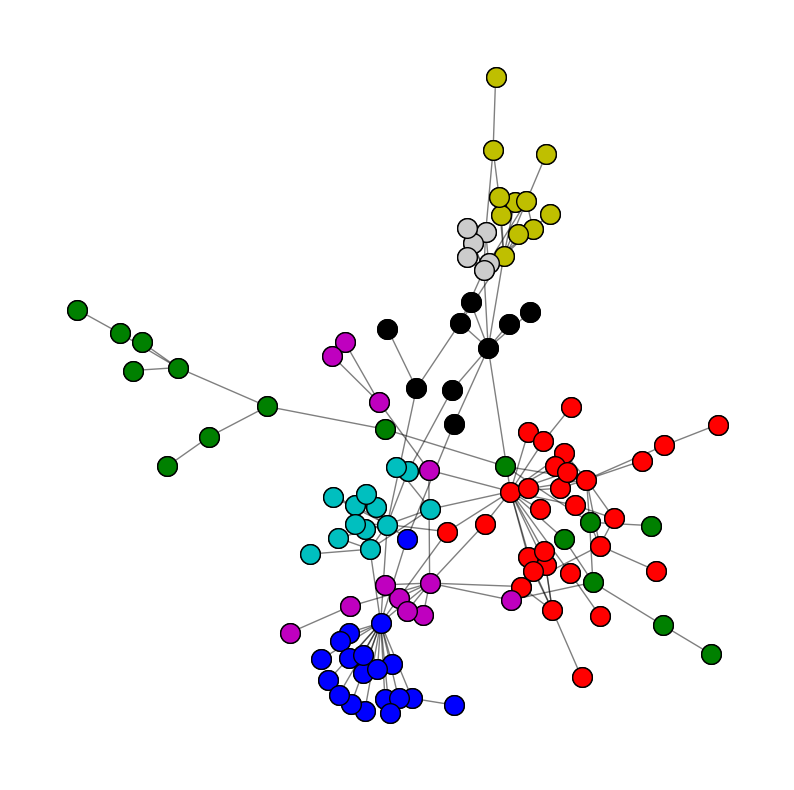

In [41]:
pos = nx.spring_layout(connected_components_w[1])
viz.plot_network_clusters(connected_components_w[1], leiden_coms_w, pos, figsize=(10, 10))

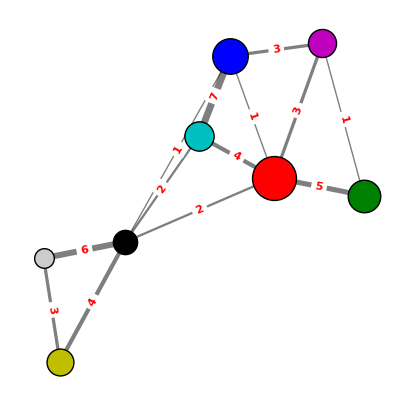

In [42]:
viz.plot_community_graph(connected_components_w[1], leiden_coms_w, figsize=(5, 5))

In [43]:
connected_components_w[1].nodes

NodeView(('CH.ifa.draw.figures.RectangleFigure', 'CH.ifa.draw.standard.BoxHandleKit', 'CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.framework.Figure', 'CH.ifa.draw.standard.HandleTracker', 'CH.ifa.draw.standard.AbstractTool', 'CH.ifa.draw.samples.javadraw.JavaDrawApp', 'CH.ifa.draw.util.CommandMenu', 'CH.ifa.draw.standard.ActionTool', 'CH.ifa.draw.samples.javadraw.PatternPainter', 'CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.contrib.PolygonTool', 'CH.ifa.draw.standard.SelectAreaTracker', 'CH.ifa.draw.figures.RoundRectangleFigure', 'CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.application.DrawApplication', 'CH.ifa.draw.standard.DragTracker', 'CH.ifa.draw.applet.DrawApplet', 'CH.ifa.draw.standard.StandardDrawingView', 'CH.ifa.draw.standard.BringToFrontCommand', 'CH.ifa.draw.samples.net.NetApp', 'CH.ifa.draw.figures.TextTool', 'CH.ifa.draw.standard.TextHolder', 'CH.ifa.draw.util.CommandChoice', 'CH.ifa.draw.standard.ConnectionHandle', 'CH.ifa.draw.framework.ConnectionFigure

In [28]:
def recursive_leiden(G):
    # Create a mapping from original node names to integer node names
    node_mapping = {node: i for i, node in enumerate(G.nodes)}
    inv_node_mapping = {i: node for node, i in node_mapping.items()}
    
    # Create a new graph with integer node names
    G_int = nx.relabel_nodes(G, node_mapping)
    
    # Base case: if the graph is a single community, return it
    leiden_coms = algorithms.leiden(G_int.copy(), weights='weight')
    if len(leiden_coms.communities) == 1:
        return [G], inv_node_mapping
    
    # Recursive case: apply the Leiden algorithm to each community
    subgraphs = [G_int.subgraph(c).copy() for c in leiden_coms.communities]
    return [sg for g in subgraphs for sg in recursive_leiden(nx.relabel_nodes(g, inv_node_mapping))[0]], inv_node_mapping


G_leiden_coms_w, inv_node_mapping = recursive_leiden(connected_components_w[1])

# Convert communities back to original node names
G_leiden_coms_w_orig = [nx.relabel_nodes(g, inv_node_mapping) for g in G_leiden_coms_w]

len(G_leiden_coms_w_orig), G_leiden_coms_w_orig

(29,
  <networkx.classes.graph.Graph at 0x1d19625ebe0>])

In [32]:
for i in range(len(G_leiden_coms_w_orig)):
    print(len(G_leiden_coms_w_orig[i].edges(data=True)), G_leiden_coms_w_orig[i].edges(data=True))

5 [('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.standard.SouthWestHandle', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.standard.NorthHandle', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.figures.GroupFigure', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.standard.NorthEastHandle', {'weight': 1}), ('CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.standard.WestHandle', {'weight': 1})]
1 [('CH.ifa.draw.standard.StandardDrawing', 'CH.ifa.draw.framework.DrawingChangeListener', {'weight': 1})]
5 [('CH.ifa.draw.framework.Figure', 'CH.ifa.draw.figures.BorderDecorator', {'weight': 1}), ('CH.ifa.draw.framework.Figure', 'CH.ifa.draw.figures.ElbowTextLocator', {'weight': 1}), ('CH.ifa.draw.framework.Figure', 'CH.ifa.draw.figures.ElbowHandle', {'weight': 4}), ('CH.ifa.draw.framework.Figure', 'CH.ifa.draw.standard.ConnectionTool', {'weight': 3}), ('CH.ifa.draw.framework.Figure', 'CH.ifa.draw.figures.ElbowConnecti

In [29]:
G_leiden_coms_w = [G_w.subgraph(c).copy() for c in leiden_coms_w.communities]

len(G_leiden_coms_w), G_leiden_coms_w

(9,
  <networkx.classes.graph.Graph at 0x27402f22e20>])

In [30]:
G_leiden_coms_w[0].edges(data=True)

EdgeDataView([('CH.ifa.draw.standard.NullHandle', 'CH.ifa.draw.standard.AbstractHandle', {'weight': 1}), ('CH.ifa.draw.contrib.TriangleRotationHandle', 'CH.ifa.draw.standard.AbstractHandle', {'weight': 1}), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.CopyCommand', {'weight': 1}), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.framework.DrawingView', {'weight': 1}), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.util.Clipboard', {'weight': 1}), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.DeleteCommand', {'weight': 1}), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.CutCommand', {'weight': 1}), ('CH.ifa.draw.standard.ChangeAttributeCommand', 'CH.ifa.draw.framework.DrawingView', {'weight': 2}), ('CH.ifa.draw.standard.PasteCommand', 'CH.ifa.draw.framework.DrawingView', {'weight': 1}), ('CH.ifa.draw.figures.RadiusHandle', 'CH.ifa.draw.standard.AbstractHandle', {'weight': 1}), ('CH.ifa.draw.cont

In [31]:
dict_edges_list_w = dict()

for i in range(len(G_leiden_coms_w)):
    dict_edges_list_w['G_leiden_coms_w[{}]'.format(i)] = [(u, v, data['weight']) for u, v, data in G_leiden_coms_w[i].edges(data=True)]

print(dict_edges_list_w)

{'G_leiden_coms_w[0]': [('CH.ifa.draw.standard.NullHandle', 'CH.ifa.draw.standard.AbstractHandle', 1), ('CH.ifa.draw.contrib.TriangleRotationHandle', 'CH.ifa.draw.standard.AbstractHandle', 1), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.CopyCommand', 1), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.framework.DrawingView', 1), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.util.Clipboard', 1), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.DeleteCommand', 1), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.CutCommand', 1), ('CH.ifa.draw.standard.ChangeAttributeCommand', 'CH.ifa.draw.framework.DrawingView', 2), ('CH.ifa.draw.standard.PasteCommand', 'CH.ifa.draw.framework.DrawingView', 1), ('CH.ifa.draw.figures.RadiusHandle', 'CH.ifa.draw.standard.AbstractHandle', 1), ('CH.ifa.draw.contrib.PolygonFigure', 'CH.ifa.draw.contrib.PolygonScaleHandle', 1), ('CH.ifa.draw.contrib.PolygonScaleHandle', '

In [63]:
new_leiden_coms_w = algorithms.leiden(G_leiden_coms_w[2], weights='weight')

len(new_leiden_coms_w.communities), new_leiden_coms_w.communities

(3,
 [['CH.ifa.draw.standard.AbstractTool',
   'CH.ifa.draw.standard.DragTracker',
   'CH.ifa.draw.standard.SelectAreaTracker',
   'CH.ifa.draw.standard.HandleTracker',
   'CH.ifa.draw.samples.javadraw.FollowURLTool',
   'CH.ifa.draw.contrib.PolygonTool',
   'CH.ifa.draw.figures.ScribbleTool'],
  ['CH.ifa.draw.standard.TextHolder',
   'CH.ifa.draw.figures.TextTool',
   'CH.ifa.draw.standard.CreationTool',
   'CH.ifa.draw.samples.pert.PertFigureCreationTool',
   'CH.ifa.draw.figures.ConnectedTextTool'],
  ['CH.ifa.draw.figures.BorderTool', 'CH.ifa.draw.standard.ActionTool']])

In [20]:
G_leiden_coms_w[0].edges()[0]

NameError: name 'G_leiden_coms_w' is not defined

In [ ]:
selected_w_edges = [weighted_edges_list[edge] for edge in G_leiden_coms_w[0].edges()]

In [123]:
G_da = nx.DiGraph()

G_da.add_edges_from(G_leiden_coms_w[0].edges())

G_da.edges(data=True)

OutEdgeDataView([('CH.ifa.draw.contrib.TriangleRotationHandle', 'CH.ifa.draw.standard.AbstractHandle', {}), ('CH.ifa.draw.standard.AbstractHandle', 'CH.ifa.draw.framework.DrawingView', {}), ('CH.ifa.draw.util.Clipboard', 'CH.ifa.draw.standard.FigureTransferCommand', {}), ('CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.DeleteCommand', {}), ('CH.ifa.draw.standard.CutCommand', 'CH.ifa.draw.framework.DrawingView', {}), ('CH.ifa.draw.standard.CutCommand', 'CH.ifa.draw.standard.FigureTransferCommand', {}), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.figures.GroupCommand', {}), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.DuplicateCommand', {}), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.SimpleUpdateStrategy', {}), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.FigureTransferCommand', {}), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.DeleteCommand', {}), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.s

<Figure size 2000x2000 with 0 Axes>

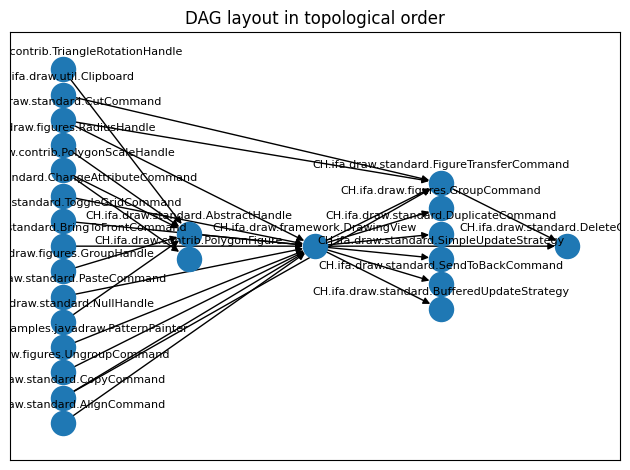

In [124]:
for layer, nodes in enumerate(nx.topological_generations(G_da)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G_da.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G_da, subset_key="layer")

label_pos = {node: (x, y+0.1) for node, (x, y) in pos.items()}
plt.figure(figsize=(20, 20))

fig, ax = plt.subplots()

nx.draw_networkx(G_da, pos=pos, ax=ax, with_labels=False)
nx.draw_networkx_labels(G_da, label_pos, font_size=8)

ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

# # Get the positions of the nodes
# pos = nx.spring_layout(connected_components_w[1])
# 
# # Create a new dictionary for label positions
# label_pos = {node: (x, y+0.02) for node, (x, y) in pos.items()}
# plt.figure(figsize=(16, 16))
# # Draw the subgraph
# nx.draw(connected_components_w[1], pos, with_labels=False)
# nx.draw_networkx_labels(connected_components_w[1], label_pos, font_size=10)
# 
# # Display the graph
# plt.show()

In [69]:
dict_hlc_w_coms = dict()

for i in range(len(G_leiden_coms_w)):
   dict_hlc_w_coms['HLC_coms_w[{}]'.format(i)] = [algorithms.hierarchical_link_community_w(G_leiden_coms_w[i])]
   
len(dict_hlc_w_coms), dict_hlc_w_coms

(9,
 {'HLC_coms_w[0]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16d591670>],
  'HLC_coms_w[1]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc38970>],
  'HLC_coms_w[2]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fdf3dc0>],
  'HLC_coms_w[3]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc38a60>],
  'HLC_coms_w[4]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc38220>],
  'HLC_coms_w[5]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc382b0>],
  'HLC_coms_w[6]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc38c10>],
  'HLC_coms_w[7]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc38a30>],
  'HLC_coms_w[8]': [<cdlib.classes.edge_clustering.EdgeClustering at 0x2a16fc38c40>]})

In [71]:
dict_hlc_w_coms['HLC_coms_w[0]'][0].to_json()

'{"communities": [[["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.DeleteCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.FigureTransferCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.CutCommand"], ["CH.ifa.draw.standard.CutCommand", "CH.ifa.draw.standard.FigureTransferCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.SimpleUpdateStrategy"], ["CH.ifa.draw.figures.GroupCommand", "CH.ifa.draw.framework.DrawingView"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.DuplicateCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.ChangeAttributeCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.SendToBackCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.AlignCommand"], ["CH.ifa.draw.standard.DeleteCommand", "CH.ifa.draw.standard.FigureTransferCommand"], ["CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.standard.AbstractHandle"], ["CH.ifa.draw.fi

In [73]:
dict_hlc_w_coms['HLC_coms_w[8]'][0].communities

[[('CH.ifa.draw.framework.ConnectionFigure',
   'CH.ifa.draw.standard.ConnectionHandle'),
  ('CH.ifa.draw.framework.ConnectionFigure',
   'CH.ifa.draw.standard.ChangeConnectionEndHandle'),
  ('CH.ifa.draw.framework.ConnectionFigure',
   'CH.ifa.draw.standard.ChangeConnectionStartHandle')]]

In [75]:
counter = 0

for i in range(len(dict_hlc_w_coms)):
    for coms in dict_hlc_w_coms['HLC_coms_w[{}]'.format(i)][0].communities:
        counter += 1
        print('HLC_w {}'.format(i+1))
        print(len(coms), coms)

print('all coms: {}'.format(counter))

HLC_w 1
21 [('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.DeleteCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.FigureTransferCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.CutCommand'), ('CH.ifa.draw.standard.CutCommand', 'CH.ifa.draw.standard.FigureTransferCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.SimpleUpdateStrategy'), ('CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.framework.DrawingView'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.DuplicateCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.ChangeAttributeCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.SendToBackCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.AlignCommand'), ('CH.ifa.draw.standard.DeleteCommand', 'CH.ifa.draw.standard.FigureTransferCommand'), ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.AbstractHandle'), ('CH.ifa.draw.figures.U

In [82]:
dict_hlc_w_coms[0][0].communities[0][0]

('CH.ifa.draw.standard.CutCommand',
 'CH.ifa.draw.standard.FigureTransferCommand')

In [ ]:
for i in range(len(dict_hlc_w_coms)):
    for coms in dict_hlc_w_coms[i][0].communities:
        print('HLC_w {}'.format(i+1))
        print(len(coms), coms)

In [128]:
print(dir(algorithms.edge_clustering))

['EdgeClustering', 'HLC', 'HLC_read_edge_list_unweighted', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'convert_graph_formats', 'defaultdict', 'hierarchical_link_community', 'nx']


In [120]:
hlc_coms = algorithms.hierarchical_link_community_w(connected_components_w[1])

hlc_coms.to_json()

AttributeError: module 'cdlib.algorithms' has no attribute 'hierarchical_link_community_w'

In [76]:
len(hlc_coms.communities), hlc_coms.communities

(79,
 [[('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.AlignCommand'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.BufferedUpdateStrategy'),
   ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.PasteCommand'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.BringToFrontCommand'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.DuplicateCommand'),
   ('CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.framework.DrawingView'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.ToggleGridCommand'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.samples.javadraw.PatternPainter'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.ChangeAttributeCommand'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.SendToBackCommand'),
   ('CH.ifa.draw.framework.DrawingView',
    'CH.ifa.draw.standard.SimpleUpdateStrategy'),
   ('CH.ifa.draw.figures.UngroupComm

In [77]:
hlc_coms.communities[0]

[('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.AlignCommand'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.BufferedUpdateStrategy'),
 ('CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.standard.PasteCommand'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.BringToFrontCommand'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.DuplicateCommand'),
 ('CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.framework.DrawingView'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.ToggleGridCommand'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.samples.javadraw.PatternPainter'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.ChangeAttributeCommand'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.SendToBackCommand'),
 ('CH.ifa.draw.framework.DrawingView',
  'CH.ifa.draw.standard.SimpleUpdateStrategy'),
 ('CH.ifa.draw.figures.UngroupCommand', 'CH.ifa.draw.framework.DrawingView')]

In [114]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
randomize = ensemble.BoolParameter(name="randomize")

coms, scoring = ensemble.grid_search(graph=connected_components_w[1], method=algorithms.louvain,
                                                     parameters=[resolution, randomize],
                                                     quality_score=evaluation.erdos_renyi_modularity,
                                                     aggregate=max)

print("Communities:\n %s \nConfiguration: %s \nScoring: %s" %(coms.communities, coms.method_parameters, scoring))

Communities:
 [['CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.framework.Figure', 'CH.ifa.draw.figures.FontSizeHandle', 'CH.ifa.draw.standard.CompositeFigure', 'CH.ifa.draw.standard.NorthWestHandle', 'CH.ifa.draw.standard.LocatorHandle', 'CH.ifa.draw.figures.BorderDecorator', 'CH.ifa.draw.figures.ElbowTextLocator', 'CH.ifa.draw.samples.pert.PertFigure', 'CH.ifa.draw.figures.TextFigure', 'CH.ifa.draw.standard.DecoratorFigure', 'CH.ifa.draw.standard.SouthWestHandle', 'CH.ifa.draw.standard.ConnectionTool', 'CH.ifa.draw.standard.StandardDrawing', 'CH.ifa.draw.framework.DrawingChangeListener', 'CH.ifa.draw.standard.NorthHandle', 'CH.ifa.draw.standard.OffsetLocator', 'CH.ifa.draw.figures.PolyLineHandle', 'CH.ifa.draw.samples.javadraw.AnimationDecorator', 'CH.ifa.draw.figures.ElbowHandle', 'CH.ifa.draw.figures.GroupFigure', 'CH.ifa.draw.standard.SouthHandle', 'CH.ifa.draw.standard.SouthEastHandle', 'CH.ifa.draw.standard.EastHandle', 'CH.ifa.draw.standard.WestHandle', 'CH.ifa.draw.sample

In [95]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
randomize = ensemble.BoolParameter(name="randomize")
weights = ensemble.BoolParameter(name="weights", value='weight')

louvain_conf = [resolution, randomize]
leiden_conf = [weights]
# epsilon = ensemble.Parameter(name="epsilon", start=0.2, end=0.7, step=0.1)
# demon_conf = [epsilon]

methods = [algorithms.louvain, algorithms.leiden]

for coms, scoring in ensemble.pool_grid_filter(connected_components_w[1], methods, [louvain_conf, leiden_conf], quality_score=evaluation.erdos_renyi_modularity, aggregate=max):
    print("%s\nCommunities:\n %s \nConfiguration: %s \nScoring: %s\n" %(coms.method_name, coms.communities, coms.method_parameters, scoring))

Louvain
Communities:
 [['CH.ifa.draw.standard.RelativeLocator', 'CH.ifa.draw.framework.Figure', 'CH.ifa.draw.figures.FontSizeHandle', 'CH.ifa.draw.standard.CompositeFigure', 'CH.ifa.draw.standard.NorthWestHandle', 'CH.ifa.draw.standard.LocatorHandle', 'CH.ifa.draw.samples.net.NodeFigure', 'CH.ifa.draw.framework.Connector', 'CH.ifa.draw.figures.BorderDecorator', 'CH.ifa.draw.figures.ElbowTextLocator', 'CH.ifa.draw.samples.pert.PertFigure', 'CH.ifa.draw.figures.TextFigure', 'CH.ifa.draw.standard.DecoratorFigure', 'CH.ifa.draw.standard.SouthWestHandle', 'CH.ifa.draw.standard.ConnectionTool', 'CH.ifa.draw.standard.StandardDrawing', 'CH.ifa.draw.framework.DrawingChangeListener', 'CH.ifa.draw.standard.NorthHandle', 'CH.ifa.draw.standard.OffsetLocator', 'CH.ifa.draw.figures.PolyLineHandle', 'CH.ifa.draw.samples.javadraw.AnimationDecorator', 'CH.ifa.draw.figures.ElbowHandle', 'CH.ifa.draw.figures.GroupFigure', 'CH.ifa.draw.figures.AttributeFigure', 'CH.ifa.draw.standard.SouthHandle', 'CH.ifa.d

In [48]:
louvain_coms_w = algorithms.louvain(connected_components_w[1], weight='weight', resolution=1., randomize=False)

louvain_coms_w.to_json()

'{"communities": [["CH.ifa.draw.samples.javadraw.PatternPainter", "CH.ifa.draw.framework.DrawingView", "CH.ifa.draw.contrib.PolygonTool", "CH.ifa.draw.figures.GroupCommand", "CH.ifa.draw.standard.BringToFrontCommand", "CH.ifa.draw.standard.CopyCommand", "CH.ifa.draw.standard.FigureTransferCommand", "CH.ifa.draw.standard.AbstractHandle", "CH.ifa.draw.standard.DuplicateCommand", "CH.ifa.draw.contrib.PolygonScaleHandle", "CH.ifa.draw.contrib.PolygonFigure", "CH.ifa.draw.standard.SimpleUpdateStrategy", "CH.ifa.draw.figures.UngroupCommand", "CH.ifa.draw.figures.GroupHandle", "CH.ifa.draw.standard.ChangeAttributeCommand", "CH.ifa.draw.standard.AlignCommand", "CH.ifa.draw.contrib.TriangleRotationHandle", "CH.ifa.draw.standard.ToggleGridCommand", "CH.ifa.draw.figures.RadiusHandle", "CH.ifa.draw.standard.DeleteCommand", "CH.ifa.draw.standard.SendToBackCommand", "CH.ifa.draw.standard.PasteCommand", "CH.ifa.draw.util.Clipboard", "CH.ifa.draw.standard.CutCommand", "CH.ifa.draw.standard.NullHandle"

In [49]:
louvain_coms_w.average_internal_degree()

FitnessResult(min=0.0, max=2.3076923076923075, score=np.float64(0.9819227976090722), std=np.float64(1.0029519710614394))

In [64]:
louvain_coms_w.communities = louvain_coms_w.communities[:9]

for coms in louvain_coms_w.communities:
    print(len(coms), coms)

26 ['CH.ifa.draw.samples.javadraw.PatternPainter', 'CH.ifa.draw.framework.DrawingView', 'CH.ifa.draw.contrib.PolygonTool', 'CH.ifa.draw.figures.GroupCommand', 'CH.ifa.draw.standard.BringToFrontCommand', 'CH.ifa.draw.standard.CopyCommand', 'CH.ifa.draw.standard.FigureTransferCommand', 'CH.ifa.draw.standard.AbstractHandle', 'CH.ifa.draw.standard.DuplicateCommand', 'CH.ifa.draw.contrib.PolygonScaleHandle', 'CH.ifa.draw.contrib.PolygonFigure', 'CH.ifa.draw.standard.SimpleUpdateStrategy', 'CH.ifa.draw.figures.UngroupCommand', 'CH.ifa.draw.figures.GroupHandle', 'CH.ifa.draw.standard.ChangeAttributeCommand', 'CH.ifa.draw.standard.AlignCommand', 'CH.ifa.draw.contrib.TriangleRotationHandle', 'CH.ifa.draw.standard.ToggleGridCommand', 'CH.ifa.draw.figures.RadiusHandle', 'CH.ifa.draw.standard.DeleteCommand', 'CH.ifa.draw.standard.SendToBackCommand', 'CH.ifa.draw.standard.PasteCommand', 'CH.ifa.draw.util.Clipboard', 'CH.ifa.draw.standard.CutCommand', 'CH.ifa.draw.standard.NullHandle', 'CH.ifa.draw.

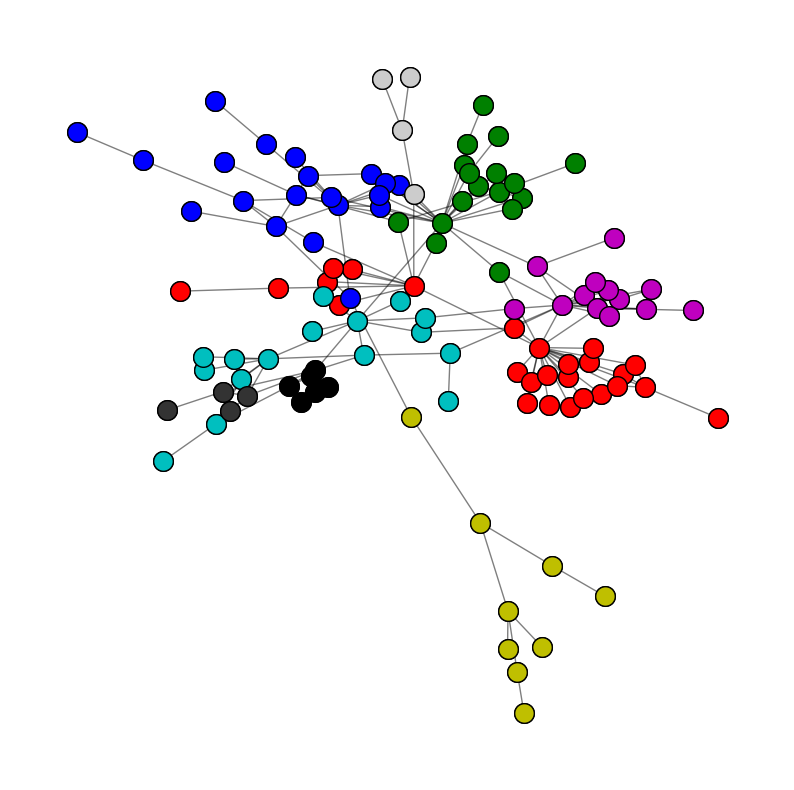

In [57]:
pos = nx.spring_layout(connected_components_w[1])
viz.plot_network_clusters(connected_components_w[1], louvain_coms_w, pos, figsize=(10, 10))

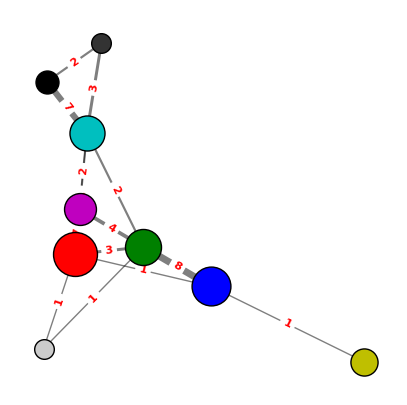

In [58]:
viz.plot_community_graph(connected_components_w[1], louvain_coms_w, figsize=(5, 5))

In [59]:
louvain_coms_w.normalized_mutual_information(leiden_coms_w)

MatchingResult(score=np.float64(0.853922928052036), std=None)